FINAL PROJECT

In [126]:
import pandas as pd
from tabulate import tabulate


In [127]:
data = pd.read_csv('/content/diabetic_data.csv')

In [128]:
data.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [129]:
data.info()
missing_values = data.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [130]:
datatest=data.copy()
datatest.replace('?', pd.NA, inplace = True)
missing_values = datatest.isnull().sum()
print(missing_values)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [131]:
dataf=pd.DataFrame(data.values,columns = data.columns)

In [132]:
def check_weight_column(data):
    is_question_mark = data['weight'] == '?'

    return is_question_mark.sum()



In [133]:
result = check_weight_column(data)
print("Nombre de cases avec '?':", result)
print(data.shape)


Nombre de cases avec '?': 98569
(101766, 50)


In [134]:
len(data)-result

3197

In [135]:
'''x=0
for i in range(len(data)):
  if data['weight'][i]!='?':
    print(data['weight'][i])
    x+=1
x'''
# pour afficher les 3197 lignes (on voit que c'est des intervalles de poids)
dataf = dataf.drop(columns=['weight'])

dataf.head()


encounter_id patient_nbr             race  gender      age  \
0      2278392     8222157        Caucasian  Female   [0-10)   
1       149190    55629189        Caucasian  Female  [10-20)   
2        64410    86047875  AfricanAmerican  Female  [20-30)   
3       500364    82442376        Caucasian    Male  [30-40)   
4        16680    42519267        Caucasian    Male  [40-50)   

  admission_type_id discharge_disposition_id admission_source_id  \
0                 6                       25                   1   
1                 1                        1                   7   
2                 1                        1                   7   
3                 1                        1                   7   
4                 1                        1                   7   

  time_in_hospital payer_code  ... citoglipton insulin glyburide-metformin  \
0                1          ?  ...          No      No                  No   
1                3          ?  ...          No      Up                  No   
2                2          ?  ...          No      No                  No   
3                2          ?  ...          No      Up                  No   
4                1          ?  ...          No  Steady                  No   

  glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                  No                       No                      No   
1                  No                       No                      No   
2                  No                       No                      No   
3                  No                       No                      No   
4                  No                       No                      No   

  metformin-pioglitazone change diabetesMed readmitted  
0                     No     No          No         NO  
1                     No     Ch         Yes        >30  
2                     No     No         Yes         NO  
3                     No     Ch         Yes         NO  
4                     No     Ch         Yes         NO  

[5 rows x 49 columns]

Sur 101.766 patients seuls 3.197 ont renseignés leurs poids.
La colonne poids n'est donc pas exploitable, on va donc la drop


In [136]:
occurrences = {}

for id in dataf["encounter_id"]:
  if id in occurrences:
    occurrences[id] += 1
  else:
    occurrences[id] = 1
print(occurrences)
occurrences_dupliquees = {k: v for k, v in occurrences.items() if v > 1}

print(occurrences_dupliquees)
#chaque patient à 1 id de rdv donc pas de doublons

{2278392: 1, 149190: 1, 64410: 1, 500364: 1, 16680: 1, 35754: 1, 55842: 1, 63768: 1, 12522: 1, 15738: 1, 28236: 1, 36900: 1, 40926: 1, 42570: 1, 62256: 1, 73578: 1, 77076: 1, 84222: 1, 89682: 1, 148530: 1, 150006: 1, 150048: 1, 182796: 1, 183930: 1, 216156: 1, 221634: 1, 236316: 1, 248916: 1, 250872: 1, 252822: 1, 253380: 1, 253722: 1, 260166: 1, 293058: 1, 293118: 1, 325848: 1, 325866: 1, 326028: 1, 358776: 1, 377268: 1, 383430: 1, 419304: 1, 421194: 1, 449142: 1, 450210: 1, 464994: 1, 486156: 1, 498030: 1, 537834: 1, 544194: 1, 550098: 1, 584136: 1, 590346: 1, 591996: 1, 604188: 1, 623880: 1, 630342: 1, 654918: 1, 669954: 1, 676416: 1, 676422: 1, 679722: 1, 682494: 1, 685086: 1, 712350: 1, 713268: 1, 715086: 1, 792402: 1, 796152: 1, 833424: 1, 870294: 1, 881016: 1, 922080: 1, 927786: 1, 955884: 1, 961464: 1, 964548: 1, 1050294: 1, 1069716: 1, 1070256: 1, 1072554: 1, 1077924: 1, 1079592: 1, 1110420: 1, 1115640: 1, 1119858: 1, 1136472: 1, 1139226: 1, 1157454: 1, 1157574: 1, 1161024: 1,

In [137]:
occurrences = {}

for id in dataf["patient_nbr"]:
  if id in occurrences:
    occurrences[id] += 1
  else:
    occurrences[id] = 1
occurrences_dupliquees = {k: v for k, v in occurrences.items() if v > 1}

print(occurrences_dupliquees)
#on obtient un dictionnaire des patients qui ont eu plusieurs rdv et le nombre de rdv

{85504905: 2, 115196778: 5, 41606064: 3, 80845353: 3, 114715242: 2, 63023292: 3, 112002975: 2, 66274866: 2, 86240259: 2, 21820806: 2, 63754317: 2, 23043240: 3, 55152216: 2, 105366150: 2, 101707335: 2, 54746082: 2, 22997880: 2, 106343838: 3, 72405540: 2, 720936: 4, 1719279: 7, 5041602: 3, 276606: 10, 53612379: 2, 5332491: 2, 5287950: 7, 608841: 3, 1741662: 3, 90460242: 3, 4311585: 2, 981198: 2, 720369: 2, 384939: 16, 708741: 2, 688347: 2, 1784367: 2, 2604141: 2, 1427400: 5, 6656679: 6, 1451637: 2, 279009: 2, 2283327: 2, 780975: 4, 2596824: 2, 1121121: 3, 87806799: 2, 6539481: 4, 3053970: 3, 5014656: 2, 634689: 2, 48573: 5, 105589584: 3, 1160226: 5, 8320608: 2, 492012: 2, 924174: 2, 284400: 6, 4030317: 4, 580788: 2, 2341521: 6, 3094443: 4, 108387207: 2, 567018: 5, 369684: 5, 277065: 5, 1660293: 23, 419832: 4, 1217313: 2, 481788: 4, 4624767: 2, 541134: 3, 929223: 3, 42867: 2, 1421838: 2, 430092: 5, 1802943: 4, 493038: 2, 5832918: 2, 2486844: 15, 81353088: 3, 2579337: 2, 2579427: 2, 119016

In [138]:
occurrences = {}

for id in data["race"]:
  if id in occurrences:
    occurrences[id] += 1
  else:
    occurrences[id] = 1

print(occurrences)
#on obtient un dictionnaire des différentes races de patient.

{'Caucasian': 76099, 'AfricanAmerican': 19210, '?': 2273, 'Other': 1506, 'Asian': 641, 'Hispanic': 2037}


In [139]:

for col in dataf.columns:
    occurrences = {}

    for value in dataf[col]:
        if value in occurrences:
            occurrences[value] += 1
        else:
            occurrences[value] = 1

    occurrences_dupliquees = {k: v for k, v in occurrences.items() if v > 1}

    table_data = [(k, v) for k, v in occurrences_dupliquees.items()]
    table_transposed = list(map(list, zip(*table_data)))
    print(f"\nOccurrences pour la colonne '{col}':\n")
    print(tabulate(table_transposed, tablefmt='grid'))


Occurrences pour la colonne 'encounter_id':



Occurrences pour la colonne 'patient_nbr':

+----------+-----------+----------+----------+-----------+----------+-----------+----------+----------+----------+----------+----------+----------+-----------+-----------+----------+----------+-----------+----------+--------+---------+---------+--------+----------+---------+---------+--------+---------+----------+---------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+--------+---------+--------+---------+---------+----------+---------+---------+---------+--------+-------+-----------+---------+---------+--------+--------+--------+---------+--------+---------+---------+-----------+--------+--------+--------+---------+--------+---------+--------+---------+--------+--------+-------+---------+--------+---------+--------+---------+---------+----------+---------+---------+---------+--------+-------+---------+---------+----------+--------+--------+------

metformin-pioglitazone 'metformin-rosiglitazone''glipizide-metformin' 'glimepiride-pioglitazone''glyburide-metformin' 'glipizide-metformin''miglitol' 'troglitazone''tolazamide''examide' 'citoglipton''acarbose''rosiglitazone''pioglitazone''tolbutamide''glyburide' 'acetohexamide''chlorpropamide''nateglinide' 'repaglinide'
sont des colonnes qui ne servent pas car très peu renseingnées


In [140]:
print(dataf.columns)
useless = ['metformin-pioglitazone','metformin-rosiglitazone','glipizide-metformin','glimepiride-pioglitazone','glyburide-metformin','miglitol','troglitazone','tolazamide','examide','citoglipton','acarbose','rosiglitazone','pioglitazone','tolbutamide','glyburide','acetohexamide','chlorpropamide','nateglinide','repaglinide']
for erase in useless:
  dataf = dataf.drop(columns=[erase])
print(dataf.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admissio

In [141]:
#enlève les 3 gender non renseignées
indx = 0
for x in dataf["gender"]:
  if x=="Unknown/Invalid":
    dataf = dataf.drop(index=indx)
  indx+=1


In [142]:
#rendu final
for col in dataf.columns:
    occurrences = {}

    for value in dataf[col]:
        if value in occurrences:
            occurrences[value] += 1
        else:
            occurrences[value] = 1

    occurrences_dupliquees = {k: v for k, v in occurrences.items() if v > 1}

    table_data = [(k, v) for k, v in occurrences_dupliquees.items()]
    table_transposed = list(map(list, zip(*table_data)))
    print(f"\nOccurrences pour la colonne '{col}':\n")
    print(tabulate(table_transposed, tablefmt='grid'))


Occurrences pour la colonne 'encounter_id':



Occurrences pour la colonne 'patient_nbr':

+----------+-----------+----------+----------+-----------+----------+-----------+----------+----------+----------+----------+----------+----------+-----------+-----------+----------+----------+-----------+----------+--------+---------+---------+--------+----------+---------+---------+--------+---------+----------+---------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+--------+---------+--------+---------+---------+----------+---------+---------+---------+--------+-------+-----------+---------+---------+--------+--------+--------+---------+--------+---------+---------+-----------+--------+--------+--------+---------+--------+---------+--------+---------+--------+--------+-------+---------+--------+---------+--------+---------+---------+----------+---------+---------+---------+--------+-------+---------+---------+----------+--------+--------+------

In [143]:
# pour afficher la matrice de correlation (inutile ici)
from scipy.stats import chi2_contingency

# Supposons que votre jeu de données est stocké dans une variable 'data'

# Sélectionnez uniquement les colonnes catégorielles
categorical_columns = data.select_dtypes(include=['object']).columns

# Initialisez une liste pour stocker les résultats du test du chi2
chi2_results = []

# Boucle sur toutes les combinaisons de colonnes catégorielles
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Créez un tableau de contingence
            contingency_table = pd.crosstab(data[col1], data[col2])

            # Effectuez le test du chi2
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Stockez les résultats dans la liste
            chi2_results.append({
                'Colonne1': col1,
                'Colonne2': col2,
                'Chi2': chi2,
                'P-value': p
            })

# Créez un DataFrame à partir des résultats
chi2_df = pd.DataFrame(chi2_results)

# Affichez le DataFrame
print(chi2_df)


        Colonne1                  Colonne2         Chi2        P-value
0           race                    gender   597.106728  7.338990e-122
1           race                       age  3725.434967   0.000000e+00
2           race                    weight   691.649333  1.112651e-116
3           race                payer_code  3903.944560   0.000000e+00
4           race         medical_specialty  4856.140748   0.000000e+00
...          ...                       ...          ...            ...
1327  readmitted  glimepiride-pioglitazone     1.863037   3.939550e-01
1328  readmitted   metformin-rosiglitazone     1.709789   4.253281e-01
1329  readmitted    metformin-pioglitazone     0.854886   6.521746e-01
1330  readmitted                    change   215.825001   1.362061e-47
1331  readmitted               diabetesMed   386.510884   1.175514e-84

[1332 rows x 4 columns]


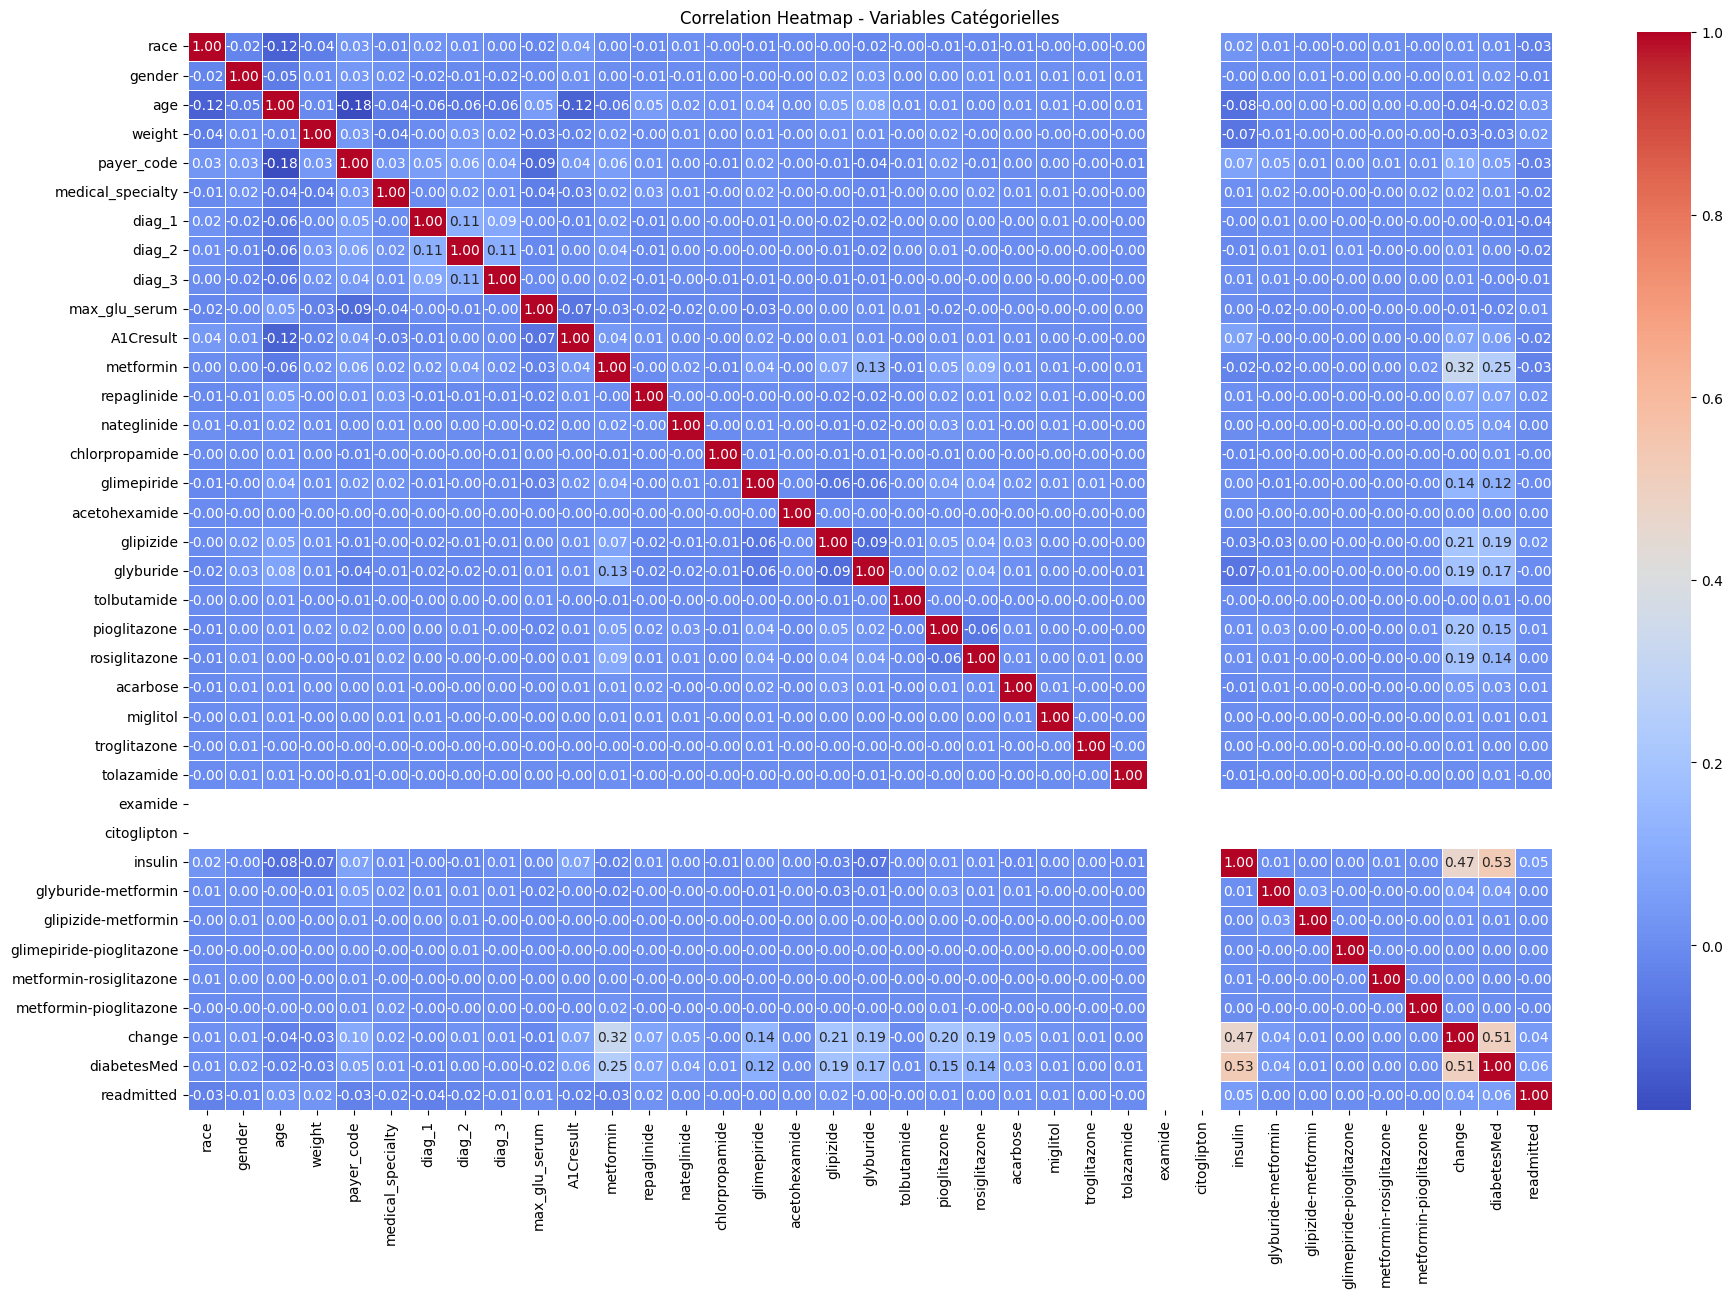

In [144]:

import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre jeu de données est stocké dans une variable 'data'

# Sélectionnez uniquement les colonnes catégorielles
categorical_columns = data.select_dtypes(include=['object']).columns

# Créez une sous-table avec uniquement les colonnes catégorielles
categorical_data = data[categorical_columns]

# Calculez la matrice de corrélation (en utilisant la méthode de cramer_v pour les variables catégorielles)
corr_matrix = categorical_data.apply(lambda x: x.factorize()[0]).corr(method='pearson')

# Créez une heatmap avec seaborn
plt.figure(figsize=(22, 14))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap - Variables Catégorielles")
plt.show()


Pas de lien très fort donc rien à simplifier

In [145]:
clean=["payer_code","medical_specialty","diag_1","diag_2","diag_3","max_glu_serum","A1Cresult","metformin","glimepiride","change","encounter_id","patient_nbr"]

In [146]:
#pour la modélisation avec random Forest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#create the pipeline
ML_pipeline = make_pipeline(StandardScaler(),PCA(n_components=2),RandomForestClassifier(criterion= "entropy", n_estimators=1000,max_depth=2, random_state=2))


In [147]:
copydataf=dataf.copy()
for erase in clean:

 copydataf= copydataf.drop(columns=[erase])


In [148]:
#rendu final
for col in copydataf.columns:
    occurrences = {}

    for value in copydataf[col]:
        if value in occurrences:
            occurrences[value] += 1
        else:
            occurrences[value] = 1

    occurrences_dupliquees = {k: v for k, v in occurrences.items() if v > 1}

    table_data = [(k, v) for k, v in occurrences_dupliquees.items()]
    table_transposed = list(map(list, zip(*table_data)))
    print(f"\nOccurrences pour la colonne '{col}':\n")
    print(tabulate(table_transposed, tablefmt='grid'))


Occurrences pour la colonne 'race':

+-----------+-----------------+------+-------+-------+----------+
| Caucasian | AfricanAmerican | ?    | Other | Asian | Hispanic |
+-----------+-----------------+------+-------+-------+----------+
| 76099     | 19210           | 2271 | 1505  | 641   | 2037     |
+-----------+-----------------+------+-------+-------+----------+

Occurrences pour la colonne 'gender':

+--------+-------+
| Female | Male  |
+--------+-------+
| 54708  | 47055 |
+--------+-------+

Occurrences pour la colonne 'age':

+--------+---------+---------+---------+---------+---------+---------+---------+---------+----------+
| [0-10) | [10-20) | [20-30) | [30-40) | [40-50) | [50-60) | [60-70) | [70-80) | [80-90) | [90-100) |
+--------+---------+---------+---------+---------+---------+---------+---------+---------+----------+
| 161    | 691     | 1657    | 3775    | 9685    | 17256   | 22482   | 26066   | 17197   | 2793     |
+--------+---------+---------+---------+---------+--

In [149]:
copydataf.replace('No', 0, inplace = True)
copydataf.replace('NO', 0, inplace = True)
copydataf.replace('Female', 0, inplace = True)
copydataf.replace('Male', 1, inplace = True)
copydataf.replace('Caucasian', 1, inplace = True)
copydataf.replace('AfricanAmerican', 2, inplace = True)
copydataf.replace('?', 0, inplace = True)
copydataf.replace('Other', 3, inplace = True)
copydataf.replace('Asian', 4, inplace = True)
copydataf.replace('Hispanic', 5, inplace = True)
copydataf.replace('[0-10)', 0, inplace = True)
copydataf.replace('[10-20)', 1, inplace = True)
copydataf.replace('[20-30)', 2, inplace = True)
copydataf.replace('[30-40)', 3, inplace = True)
copydataf.replace('[40-50)', 4, inplace = True)
copydataf.replace('[50-60)', 5, inplace = True)
copydataf.replace('[60-70)', 6, inplace = True)
copydataf.replace('[70-80)', 7, inplace = True)
copydataf.replace('[80-90)', 8, inplace = True)
copydataf.replace('[90-100)', 9, inplace = True)
copydataf.replace('Steady', 1, inplace = True)
copydataf.replace('Up', 2, inplace = True)
copydataf.replace('Down', 3, inplace = True)
copydataf.replace('Yes', 1, inplace = True)
copydataf.replace('>30', 1, inplace = True)
copydataf.replace('<30', 2, inplace = True)


In [150]:
#rendu final
for col in copydataf.columns:
    occurrences = {}

    for value in copydataf[col]:
        if value in occurrences:
            occurrences[value] += 1
        else:
            occurrences[value] = 1

    occurrences_dupliquees = {k: v for k, v in occurrences.items() if v > 1}

    table_data = [(k, v) for k, v in occurrences_dupliquees.items()]
    table_transposed = list(map(list, zip(*table_data)))
    print(f"\nOccurrences pour la colonne '{col}':\n")
    print(tabulate(table_transposed, tablefmt='grid'))


Occurrences pour la colonne 'race':

+-------+-------+------+------+-----+------+
|     1 |     2 |    0 |    3 |   4 |    5 |
+-------+-------+------+------+-----+------+
| 76099 | 19210 | 2271 | 1505 | 641 | 2037 |
+-------+-------+------+------+-----+------+

Occurrences pour la colonne 'gender':

+-------+-------+
|     0 |     1 |
+-------+-------+
| 54708 | 47055 |
+-------+-------+

Occurrences pour la colonne 'age':

+-----+-----+------+------+------+-------+-------+-------+-------+------+
|   0 |   1 |    2 |    3 |    4 |     5 |     6 |     7 |     8 |    9 |
+-----+-----+------+------+------+-------+-------+-------+-------+------+
| 161 | 691 | 1657 | 3775 | 9685 | 17256 | 22482 | 26066 | 17197 | 2793 |
+-----+-----+------+------+------+-------+-------+-------+-------+------+

Occurrences pour la colonne 'admission_type_id':

+------+-------+-------+-------+----+------+-----+----+
|    6 |     1 |     2 |     3 |  4 |    5 |   8 |  7 |
+------+-------+-------+-------+----+

In [151]:
X=copydataf.loc[:,"race":"admission_type_id"]
p=copydataf.loc[:,"glipizide":"insulin"]
x = pd.concat([X, p], axis=1)
y=copydataf.loc[:,"diabetesMed"]
x

race  gender  age  admission_type_id  glipizide  insulin
0          1       0    0                  6          0        0
1          1       0    1                  1          0        2
2          2       0    2                  1          1        0
3          1       1    3                  1          0        2
4          1       1    4                  1          1        1
...      ...     ...  ...                ...        ...      ...
101761     2       1    7                  1          0        3
101762     2       0    8                  1          0        1
101763     1       1    7                  1          0        3
101764     1       0    8                  2          1        2
101765     1       1    7                  1          0        0

[101763 rows x 6 columns]

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

# Create the pipeline
ML_pipeline_with_PCA = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(criterion='entropy', random_state=22))
])

# Define the parameter grid
param_grid = {
    'pca__n_components': [6],  # Adjust the values as needed
    'classifier__n_estimators': [50, 100],  # Adjust the values as needed
    'classifier__max_depth': [3, 5, 8]  # Adjust the values as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(ML_pipeline_with_PCA, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Predict and score using the best model
y_pred_with_best_params = best_model.predict(X_test)
test_acc_with_best_params = best_model.score(X_test, y_test)

print(f'Test accuracy with best parameters: {test_acc_with_best_params:.3f}')


Best Parameters: {'classifier__max_depth': 8, 'classifier__n_estimators': 50, 'pca__n_components': 6}
Test accuracy with best parameters: 0.828


n_etimators=50 maxdeapth=8

In [153]:
#groupe parametre classic
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

# Create the pipeline
ML_pipeline_with_PCA = make_pipeline(StandardScaler(), PCA(n_components=6), RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=8, random_state=22))

# Fit the pipeline
ML_pipeline_with_PCA.fit(X_train, y_train)

# Predict and score
y_pred_with_PCA = ML_pipeline_with_PCA.predict(X_test)
test_acc_with_PCA = ML_pipeline_with_PCA.score(X_test, y_test)

print(f'Test accuracy with PCA: {test_acc_with_PCA:.3f}')

Test accuracy with PCA: 0.828


In [159]:
#en rajoutant readmitted au groupe classic cela diminue
X1=copydataf.loc[:,"race":"admission_type_id"]
p1=copydataf.loc[:,"glipizide":"insulin"]
d1=copydataf.loc[:,"readmitted"]
x1 = pd.concat([X1, p1], axis=1)
x1 = pd.concat([x1, d1], axis=1)
y1=copydataf.loc[:,"diabetesMed"]


X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=41)

# Create the pipeline
ML_pipeline_with_PCA = make_pipeline(StandardScaler(), PCA(n_components=7), RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=8, random_state=22))

# Fit the pipeline
ML_pipeline_with_PCA.fit(X_train, y_train)

# Predict and score
y_pred_with_PCA = ML_pipeline_with_PCA.predict(X_test)
test_acc_with_PCA = ML_pipeline_with_PCA.score(X_test, y_test)

print(f'Test accuracy with PCA: {test_acc_with_PCA:.3f}')

Test accuracy with PCA: 0.822


In [160]:
#avec tous les parametres ça dimininue énormément
X2=copydataf.loc[:,"race":"insulin"]
p2=copydataf.loc[:,"readmitted"]
x2 = pd.concat([X2, p2], axis=1)
y2=copydataf.loc[:,"diabetesMed"]


X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=41)

# Create the pipeline
ML_pipeline_with_PCA = make_pipeline(StandardScaler(), PCA(n_components=17), RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=8, random_state=22))

# Fit the pipeline
ML_pipeline_with_PCA.fit(X_train, y_train)

# Predict and score
y_pred_with_PCA = ML_pipeline_with_PCA.predict(X_test)
test_acc_with_PCA = ML_pipeline_with_PCA.score(X_test, y_test)

print(f'Test accuracy with PCA: {test_acc_with_PCA:.3f}')

Test accuracy with PCA: 0.798


In [161]:
#best parameters
X3=copydataf.loc[:,"admission_type_id":"admission_type_id"]
p3=copydataf.loc[:,"glipizide":"insulin"]
d3=copydataf.loc[:,"readmitted"]
x3 = pd.concat([X3, p3], axis=1)
x3 = pd.concat([x3, d3], axis=1)
y3=copydataf.loc[:,"diabetesMed"]


X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=41)

# Create the pipeline
ML_pipeline_with_PCA = make_pipeline(StandardScaler(), PCA(n_components=4), RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=8, random_state=22))

# Fit the pipeline
ML_pipeline_with_PCA.fit(X_train, y_train)

# Predict and score
y_pred_with_PCA = ML_pipeline_with_PCA.predict(X_test)
test_acc_with_PCA = ML_pipeline_with_PCA.score(X_test, y_test)

print(f'Test accuracy with PCA: {test_acc_with_PCA:.3f}')

Test accuracy with PCA: 0.830


In [168]:
#best parameters ne varie pas trop avec le random
X3=copydataf.loc[:,"admission_type_id":"admission_type_id"]
p3=copydataf.loc[:,"glipizide":"insulin"]
d3=copydataf.loc[:,"readmitted"]
x3 = pd.concat([X3, p3], axis=1)
x3 = pd.concat([x3, d3], axis=1)
y3=copydataf.loc[:,"diabetesMed"]


X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=38)

# Create the pipeline
ML_pipeline_with_PCA = make_pipeline(StandardScaler(), PCA(n_components=4), RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=8, random_state=4))

# Fit the pipeline
ML_pipeline_with_PCA.fit(X_train, y_train)

# Predict and score
y_pred_with_PCA = ML_pipeline_with_PCA.predict(X_test)
test_acc_with_PCA = ML_pipeline_with_PCA.score(X_test, y_test)

print(f'Test accuracy with PCA: {test_acc_with_PCA:.3f}')

Test accuracy with PCA: 0.832


In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=41)

# Create the pipeline
ML_pipeline_with_PCA = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(criterion='entropy', random_state=22))
])

# Define the parameter grid
param_grid = {
    'pca__n_components': [4],  # Adjust the values as needed
    'classifier__n_estimators': [50, 100],  # Adjust the values as needed
    'classifier__max_depth': [3, 5, 8]  # Adjust the values as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(ML_pipeline_with_PCA, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Predict and score using the best model
y_pred_with_best_params = best_model.predict(X_test)
test_acc_with_best_params = best_model.score(X_test, y_test)

print(f'Test accuracy with best parameters: {test_acc_with_best_params:.3f}')


Best Parameters: {'classifier__max_depth': 8, 'classifier__n_estimators': 50, 'pca__n_components': 4}
Test accuracy with best parameters: 0.830
